<a href="https://colab.research.google.com/github/siwookim1114/Data-Science-Projects/blob/main/Netflix_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Stock Price Prediction

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

## Read Data

In [ ]:
file_path = "/content/drive/MyDrive/ML AI/Data Science Projects/Data/NFLX.csv"
df = pd.read_csv(file_path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


### Column Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


## Data Preprocessing

### Check for Null Values

In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


## Covert Date Column Type

In [ ]:
## Convert dtype from object to datetime
df["Date"] = pd.to_datetime(df["Date"])
df.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5 non-null      datetime64[ns]
 1   Open       5 non-null      float64       
 2   High       5 non-null      float64       
 3   Low        5 non-null      float64       
 4   Close      5 non-null      float64       
 5   Adj Close  5 non-null      float64       
 6   Volume     5 non-null      int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 408.0 bytes


In [ ]:
## Set to index
df.set_index("Date", inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


## Exploratory Data Analysis

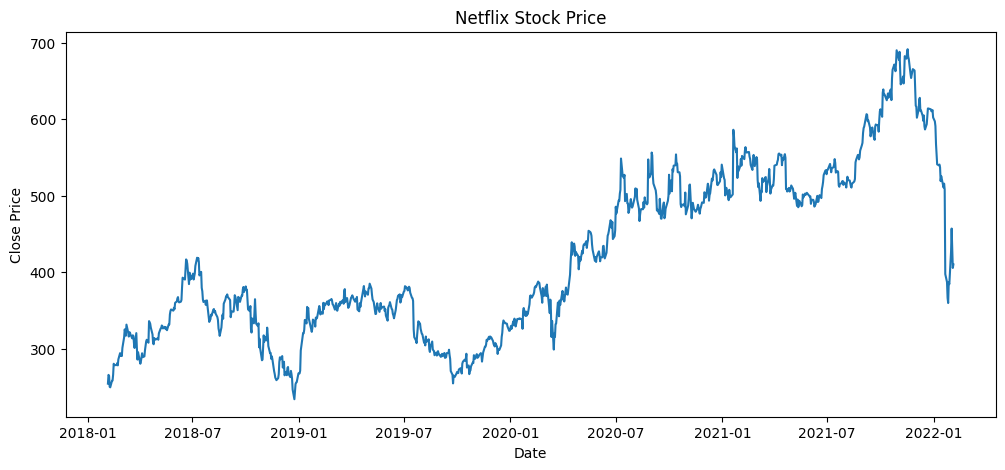

In [ ]:
## Graph of all close price from the start to end
plt.figure(figsize = (12, 5))
plt.plot(df.index, df.loc[:, "Close"])
plt.title("Netflix Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

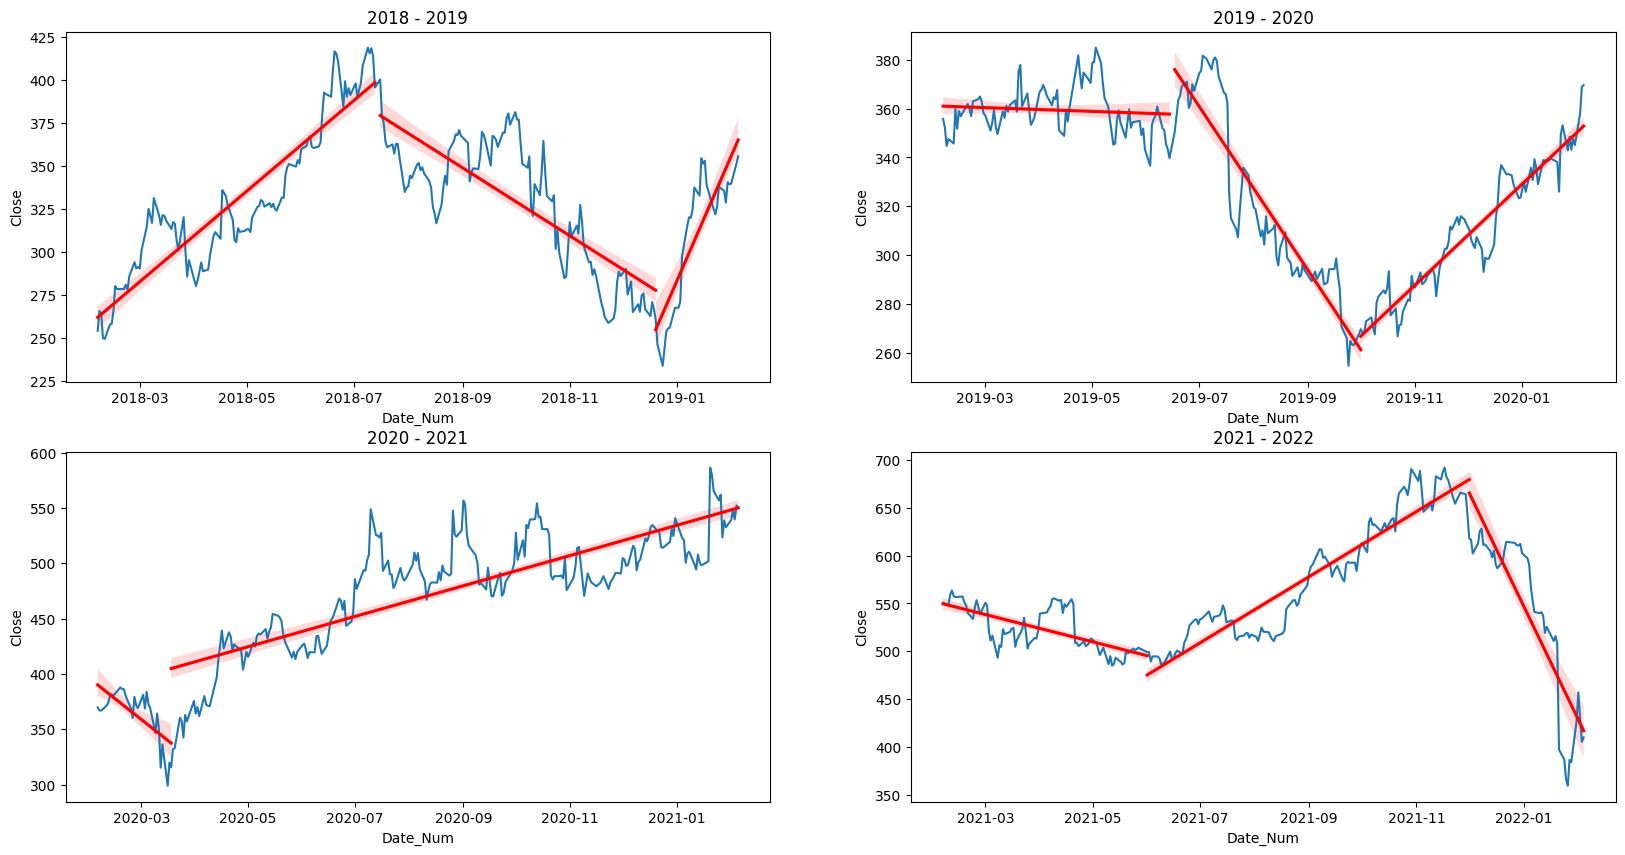

In [ ]:
## Time series graph of each year interval
fig, ax = plt.subplots(2, 2, figsize = (20, 10))

df["Date_Num"] = mdates.date2num(df.index)
# 2018 - 2019
ax[0, 0].plot(df.loc["2018-02-05" : "2019-02-05"].index, df.loc["2018-02-05" : "2019-02-05", "Close"])
sns.regplot(x = df.loc["2018-02-05" : "2018-07-15", "Date_Num"], y = df.loc["2018-02-05" : "2018-07-15", "Close"], ax = ax[0, 0], scatter = False, color = "r")
sns.regplot(x = df.loc["2018-07-15" : "2018-12-20", "Date_Num"], y = df.loc["2018-07-15" : "2018-12-20", "Close"], ax = ax[0, 0], scatter = False, color = "r")
sns.regplot(x = df.loc["2018-12-20" : "2019-02-05", "Date_Num"], y = df.loc["2018-12-20" : "2019-02-05", "Close"], ax = ax[0, 0], scatter = False, color = "r")
ax[0, 0].set_title("2018 - 2019")

# 2019 - 2020
ax[0, 1].plot(df.loc["2019-02-05" : "2020-02-05"].index, df.loc["2019-02-05" : "2020-02-05", "Close"])
sns.regplot(x = df.loc["2019-02-05" : "2019-06-15", "Date_Num"], y = df.loc["2019-02-05" : "2019-06-15", "Close"], ax = ax[0, 1], scatter = False, color = "r")
sns.regplot(x = df.loc["2019-06-15" : "2019-10-01", "Date_Num"], y = df.loc["2019-06-15" : "2019-10-01", "Close"], ax = ax[0, 1], scatter = False, color = "r")
sns.regplot(x = df.loc["2019-10-01" : "2020-02-05", "Date_Num"], y = df.loc["2019-10-01" : "2020-02-05", "Close"], ax = ax[0, 1], scatter = False, color = "r")
ax[0, 1].set_title("2019 - 2020")

# 2020 - 2021
ax[1, 0].plot(df.loc["2020-02-05" : "2021-02-05"].index, df.loc["2020-02-05" : "2021-02-05", "Close"])
sns.regplot(x = df.loc["2020-02-05" : "2020-03-18", "Date_Num"], y = df.loc["2020-02-05" : "2020-03-18", "Close"], ax = ax[1, 0], scatter = False, color= "r")
sns.regplot(x = df.loc["2020-03-18" : "2021-02-05", "Date_Num"], y = df.loc["2020-03-18" : "2021-02-05", "Close"], ax = ax[1, 0], scatter = False, color= "r")
ax[1, 0].set_title("2020 - 2021")

# 2021 - 2022
ax[1, 1].plot(df.loc["2021-02-05" : "2022-02-04"].index, df.loc["2021-02-05" : "2022-02-04", "Close"])
sns.regplot(x = df.loc["2021-02-05" : "2021-06-01", "Date_Num"], y = df.loc["2021-02-05" : "2021-06-01", "Close"], ax = ax[1, 1], scatter = False, color= "r")
sns.regplot(x = df.loc["2021-06-01" : "2021-12-01", "Date_Num"], y = df.loc["2021-06-01" : "2021-12-01", "Close"], ax = ax[1, 1], scatter = False, color= "r")
sns.regplot(x = df.loc["2021-12-01" : "2022-02-04", "Date_Num"], y = df.loc["2021-12-01" : "2022-02-04", "Close"], ax = ax[1, 1], scatter = False, color= "r")
ax[1, 1].set_title("2021 - 2022")

plt.show()

General pattern from periodicity of the graphs:
* 2018 - 2019 : Significant rise -> Drop around mid-2018 -> Recovery towards early 2019
* 2019 - 2020 : Stable period -> Decline around mid-late 2019 -> Recovery towards start of 2020
* 2020 - 2021 : Sharp Drop until Mid March 2020 -> Steady increase with fluctuations (General Upward Trend)
* 2021- 2022 : Stable (Slightly Decreasing) period -> Rise starting from mid 2021 and reaches peak at late 2021 -> Sharp Decline towards early 2022